Значення функції у точці x= -2.0  дорівнює =  11.0
Значення функції у точці x= -1.5  дорівнює =  14.75
Значення функції у точці x= -0.5  дорівнює =  10.25
Значення функції у точці x= 1.0  дорівнює =  -4.0


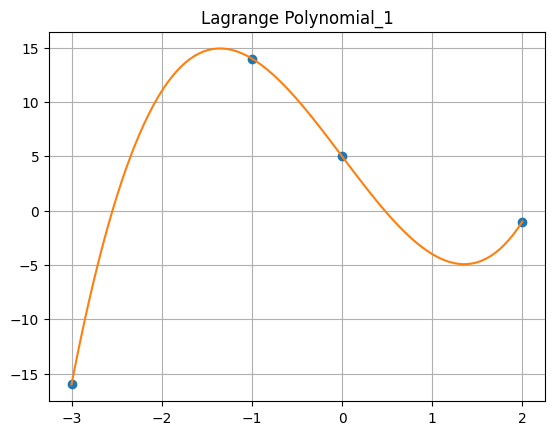

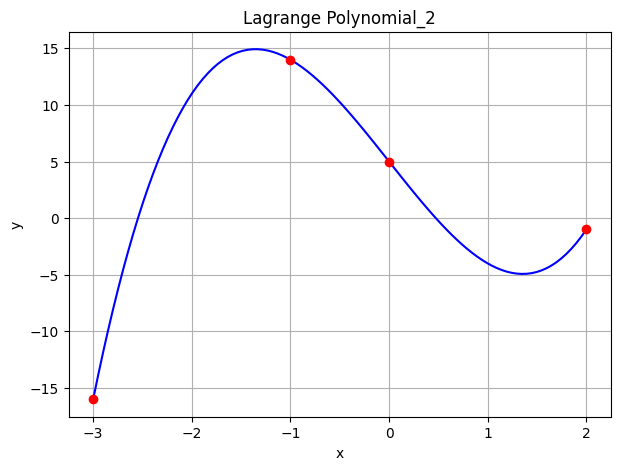

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange #імпортуємо функцію lagrange з бібліотеки

x=np.array([-3.,-1.,0.,2.], dtype=float)
y=np.array([-16.,14.,5.,-1.], dtype=float)
x_test =  np.array([-2.,-1.5,-0.5,1.], dtype=float) # точка, в якій потрібно обчислити значення

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює добутку (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена у точці x_test

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
for i in x_test:
    f_interp = lagrange_interpolation(x, y, i)
    print("Значення функції у точці x=", i, " дорівнює = ", f_interp.round(4))

xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа
plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

#Перевірка 
f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial_2')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
